In [38]:
from matplotlib import pyplot as plt
import glob, random
import cv2
import numpy as np
import pandas as pd
from scipy import stats
import itertools

In [28]:
# https://www.educba.com/opencv-findcontours/

# we get the path name as a parameter
# return an image object 
def drawContours(path): 
    #read image
    img = cv2.imread(path)
    
    #make a copy
    img_cont = img.copy()
    
    #maka grayscale to get right type of image for threshold
    img_gray = cv2.cvtColor(img_cont, cv2.COLOR_BGR2GRAY)
    
    #thresh for getting contours
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)

    #get contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    #draw the contours on an image
    cv2.drawContours(img_cont, contours, -1,(0,2550,0),3)

    #return the image
    return img_cont

In [29]:
#same as above funtion with out the drawing 

# get path name as patrameter 
# return contours list
def getContours(path): 
    
    img = cv2.imread(path)
    img_cont = img.copy()
    img_gray = cv2.cvtColor(img_cont, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    
    #retuyrn the list of contour info
    return contours

In [30]:
file_path_arborio = ["../data/Arborio/*.jpg"]

In [31]:
#choose random images arborio

##add all folders file names to a list
arborio_images = glob.glob(random.choice(file_path_arborio))

##sample the list
arborio = random.sample(arborio_images, 5)

In [32]:
arborio_contours = []

##forloop from 0 to 100(AKA the lenth of sample array)
for i in range(len(arborio)):
    
    ## get countours of sample with helper function
    contours = getContours(arborio[i])
    
    ##add to array
    arborio_contours.append(contours)

# How reversing the x and y values affect everything

Text(0.5, 1.0, 'Arborio')

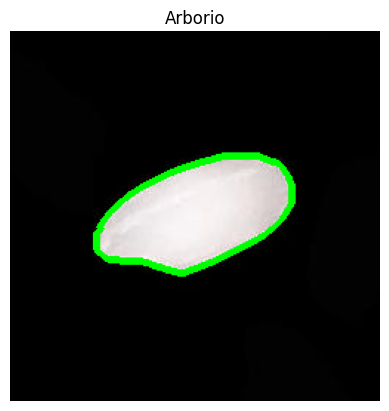

In [65]:
#contours 
arborio_img_contours = drawContours(arborio[1])

plt.imshow(arborio_img_contours)
plt.axis('off')
plt.title("Arborio")

In [84]:
# get all pixels with in contour
def getPixels(im, cnt):
    
    xs = range(0, im.shape[1])
    ys = range(0, im.shape[0])
    
    xys = list(itertools.product(xs, ys))

    im_reverse = im.copy()
    channel_values = []
    channel_values_reverse = []
    for x, y in xys:
        
        # check if the point (x,y) is within the contour
        if cv2.pointPolygonTest(cnt, (x,y), False) == 1:
            im[x, y] = [0, 0, 255]
            im_reverse[y, x] = [0, 0, 255]
    
    return im, im_reverse

Text(0.5, 1.0, 'reversed')

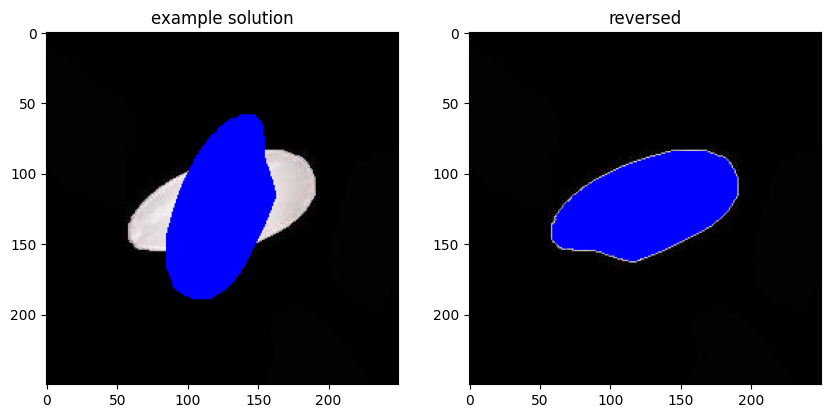

In [85]:
img = cv2.imread(arborio[1])

# get pixels of rice 
im, rev = getPixels(img, arborio_contours[1][0])

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(im)
plt.title('example solution')

fig.add_subplot(rows, columns, 2)
plt.imshow(rev)
plt.title('reversed')
